### Importing Libraries

In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers
from keras.datasets import cifar100
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D
from keras.callbacks import LearningRateScheduler
from keras.utils.vis_utils import plot_model

### Data and Parameter Initialization

In [2]:
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

# For reference in future
x_train_actual,x_test_actual = x_train,x_test
y_train_actual,y_test_actual = y_train,y_test

# Hyper Parameters
n = 5
num_epochs = 125
batch_size = 64
num_classes = 10
weight_decay = 1e-3

# Labels for Data set
labelSet = ['airplane',										
'automobile',										
'bird',										
'cat',										
'deer',										
'dog',										
'frog',										
'horse',										
'ship',										
'truck']

dset = ['beaver',' dolphin',' otter',' seal',' whale',
'fish',' flatfish',' ray',' shark',' trout',
'orchids',' poppies',' roses',' sunflowers',' tulips',
'bottles',' bowls',' cans',' cups',' plates',
'apples',' mushrooms',' oranges',' pears',' sweet peppers',
'clock',' computer keyboard',' lamp',' telephone',' television',
'bed',' chair',' couch',' table',' wardrobe',
'bee',' beetle',' butterfly',' caterpillar',' cockroach',
'bear',' leopard',' lion',' tiger',' wolf',
'bridge',' castle',' house',' road',' skyscraper',
'cloud',' forest',' mountain',' plain',' sea',
'camel',' cattle',' chimpanzee',' elephant',' kangaroo',
'fox',' porcupine',' possum',' raccoon',' skunk',
'crab',' lobster',' snail',' spider',' worm',
'baby',' boy',' girl',' man',' woman',
'crocodile',' dinosaur',' lizard',' snake',' turtle',
'hamster',' mouse',' rabbit',' shrew',' squirrel',
'maple',' oak',' palm',' pine',' willow',
'bicycle',' bus',' motorcycle',' pickup truck',' train',
'lawn-mower',' rocket',' streetcar',' tank',' tractor']

results = {}
for i in range(len(dset)):
  results[i] = dset[i]

In [4]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
 
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train=np_utils.to_categorical(y_train,100)
y_test=np_utils.to_categorical(y_test,100)
 
num_classes=y_test.shape[1]

### Sampling Images

                               Actual Dataset
 ---------------------------------------------------------------------------


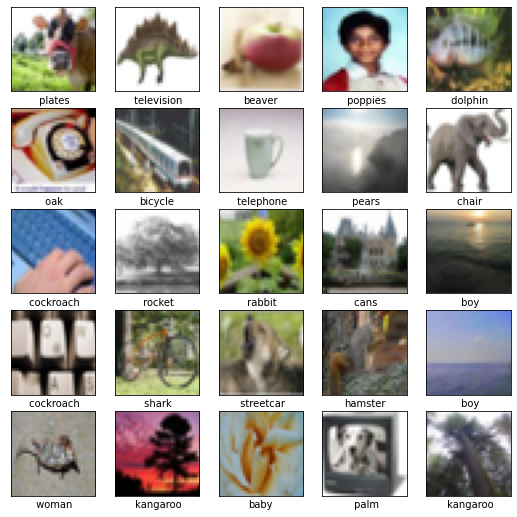

In [5]:
def show_imgs(X,Y,n):
  k = 0
  fig = plt.figure(figsize=(9,9))
  for i in range(n):
    for j in range(n):
      fig = plt.subplot(n,n,k+1)
      fig.set_xticks([])
      fig.set_yticks([])
      plt.xlabel(results[Y[k]])
      plt.imshow(X[k])
      k+=1
  plt.show()
print(' '*30,'Actual Dataset\n','---'*25)
show_imgs(x_train_actual,y_train_actual[::,0],n)

### Creating the Model

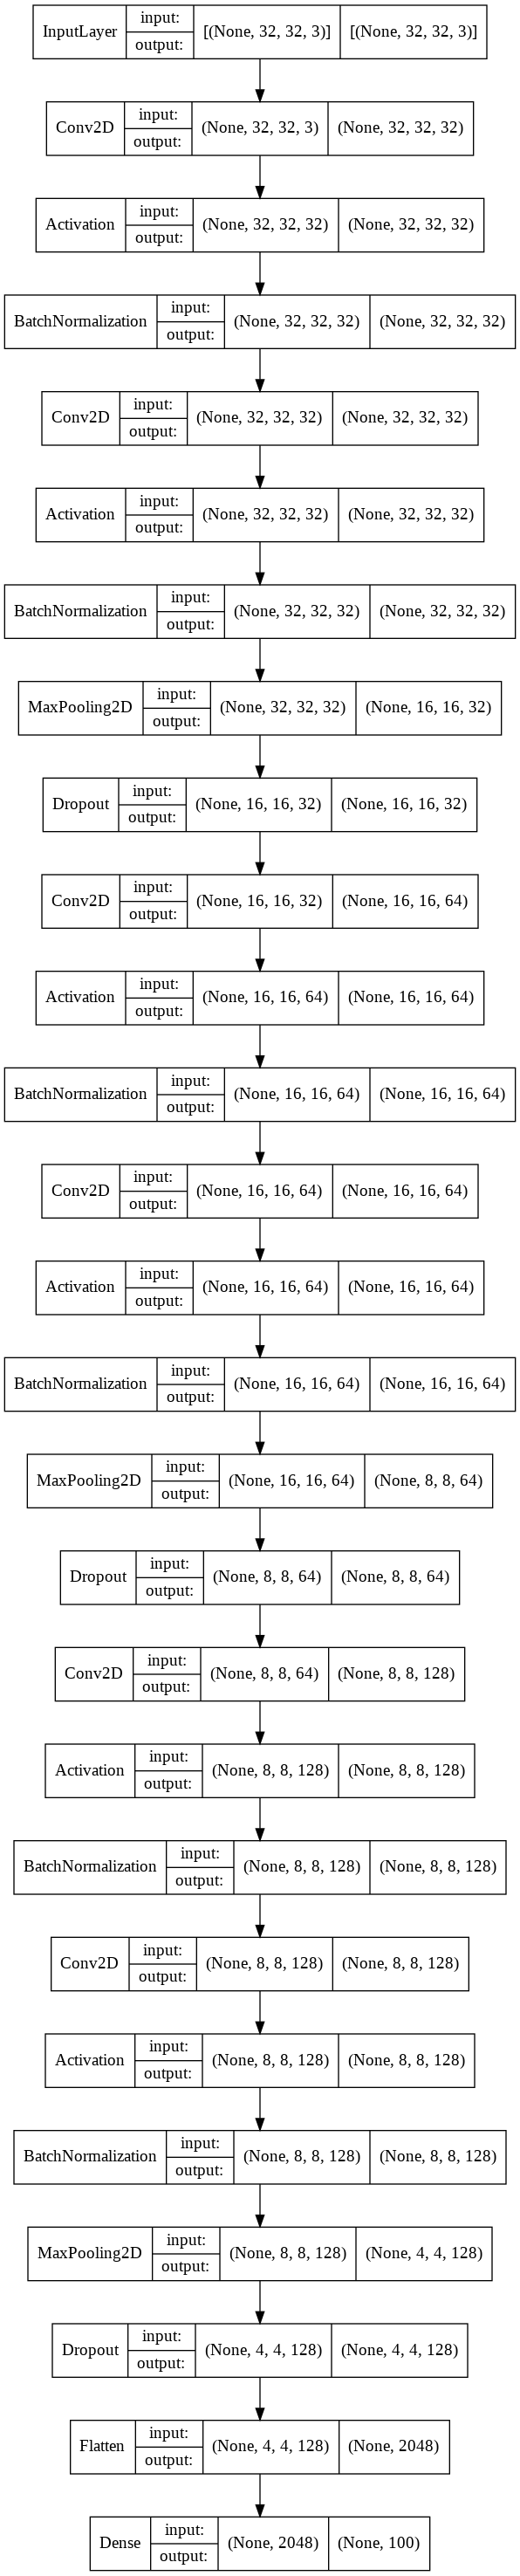

In [6]:
# baseline model with increasing dropout on the cifar10 dataset


model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)


### Extra measures to improve accuracy

In [7]:

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

opt_rms = tf.keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])


### Fitting the model

In [8]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=num_epochs,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


781/781 [==============================] - 32s 29ms/step - loss: 4.7044 - accuracy: 0.1161 - val_loss: 3.6907 - val_accuracy: 0.2075 - lr: 0.0010
Epoch 2/125
781/781 [==============================] - 22s 28ms/step - loss: 3.7141 - accuracy: 0.2206 - val_loss: 3.0991 - val_accuracy: 0.3065 - lr: 0.0010
Epoch 3/125
781/781 [==============================] - 21s 27ms/step - loss: 3.2218 - accuracy: 0.2864 - val_loss: 2.7603 - val_accuracy: 0.3774 - lr: 0.0010
Epoch 4/125
781/781 [==============================] - 21s 27ms/step - loss: 2.9305 - accuracy: 0.3338 - val_loss: 2.7972 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 5/125
781/781 [==============================] - 21s 27ms/step - loss: 2.7897 - accuracy: 0.3691 - val_loss: 2.7336 - val_accuracy: 0.3851 - lr: 0.0010
Epoch 6/125
781/781 [==============================] - 21s 27ms/step - loss: 2.6929 - accuracy: 0.3900 - val_loss: 2.4290 - val_accuracy: 0.4559 - lr: 0.0010
Epoch 7/125
781/781 [==============================] - 21s 27ms/

### Model Performance

In [9]:
score=model.evaluate(x_train,y_train)
print(f'Model has achieved a percentage of {score[1]*100}')

1563/1563 [==============================] - 5s 3ms/step - loss: 1.3206 - accuracy: 0.7007
Model has achieved a percentage of 70.06999850273132


#### Loss

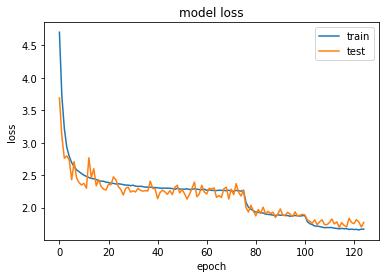

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#### Accuracy

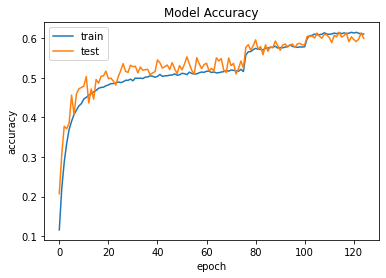

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#### Learning Rate

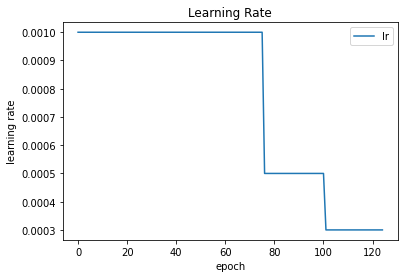

In [12]:
plt.plot(history.history['lr'])
plt.title('Learning Rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.legend(['lr'])
plt.show()

### Predictions

                               Predicted Result
 ---------------------------------------------------------------------------


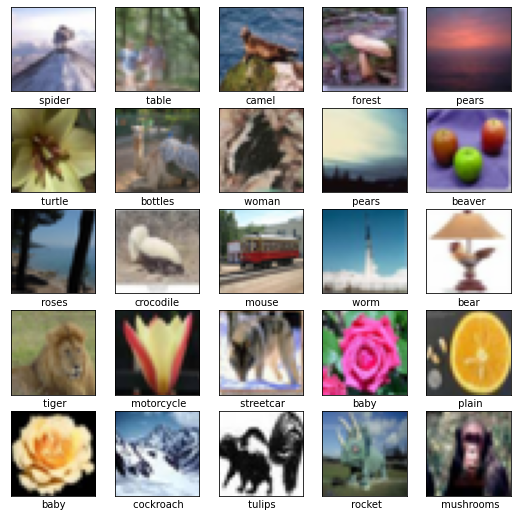

In [13]:
num_predictions = n ** 2
indices = np.argmax(model.predict(x_test[:num_predictions]),1)
print(' '*30,'Predicted Result\n','---'*25)
show_imgs(x_test_actual,indices,n)